In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../Data-processed/crop_recommendation.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
df.size


17600

In [6]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [7]:
df['label'].unique


<bound method Series.unique of 0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object>

In [8]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [9]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [10]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [11]:
acc = []
model = []

In [12]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [13]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

y_predicted = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, y_predicted)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)
z = metrics.recall_score(Ytest, y_predicted, average='micro')
print(z)
y = metrics.precision_score(Ytest, y_predicted, average='macro')
print(y)
print(metrics.f1_score(Ytest, y_predicted,average='macro'))

RF's Accuracy is:  0.990909090909091
0.990909090909091
0.992927376229084
0.9903806458718525


In [14]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree  = DecisionTreeClassifier(criterion = "entropy", random_state = 10,max_depth=5)
DecisionTree.fit(Xtrain, Ytrain)

y_predicted = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, y_predicted)

model.append('Decision Tree')
acc.append(x)

print("DecisionTrees's Accuracy is: ", x*100)
z = metrics.recall_score(Ytest, y_predicted, average='micro')
print(z)
y = metrics.precision_score(Ytest, y_predicted, average='macro')
print(y)
print(metrics.f1_score(Ytest, y_predicted,average='macro'))

DecisionTrees's Accuracy is:  90.45454545454545
0.9045454545454545
0.8475686178525934
0.8573734537379424


In [15]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()
NaiveBayes.fit(Xtrain,Ytrain)

y_predicted = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, y_predicted)

model.append('Naive Bayes')
acc.append(x)

print("Naive Bayes's Accuracy is: ", x)
z = metrics.recall_score(Ytest, y_predicted, average='micro')
print(z)
y = metrics.precision_score(Ytest, y_predicted, average='macro')
print(y)
print(metrics.f1_score(Ytest, y_predicted,average='macro'))

Naive Bayes's Accuracy is:  0.990909090909091
0.990909090909091
0.9943181818181818
0.9904761904761905


In [16]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)
LogReg.fit(Xtrain,Ytrain)

y_predicted = LogReg.predict(Xtest)
x = metrics.accuracy_score(Ytest, y_predicted)

model.append('Logistic Regression')
acc.append(x)

print("Logistic Regression's Accuracy is: ", x)
z = metrics.recall_score(Ytest, y_predicted, average='micro')
print(z)
y = metrics.precision_score(Ytest, y_predicted, average='macro')
print(y)
print(metrics.f1_score(Ytest, y_predicted,average='macro'))

Logistic Regression's Accuracy is:  0.9522727272727273
0.9522727272727273
0.9540378567543254
0.9504447004043698


In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train = lda.fit(Xtrain, Ytrain)

y_predicted = lda.predict(Xtest)
x = metrics.accuracy_score(Ytest, y_predicted)

model.append('LDA')
acc.append(x)

print("LDA's Accuracy is: ", x)
z = metrics.recall_score(Ytest, y_predicted, average='micro')
print(z)
y = metrics.precision_score(Ytest, y_predicted, average='macro')
print(y)
print(metrics.f1_score(Ytest, y_predicted,average='macro'))

LDA's Accuracy is:  0.9568181818181818
0.9568181818181818
0.9611597815155128
0.9543058126527274


In [18]:
from sklearn.ensemble import VotingClassifier
models = []
models.append(('DT', DecisionTree))
models.append(('LR', LogReg))
models.append(('RF', RF))
models.append(('NB', NaiveBayes))
models.append(('LDA', lda))

vot_soft = VotingClassifier(estimators = models, voting ='hard', weights  = [1, 2, 4, 4, 2])
vot_soft.fit(Xtrain,Ytrain)
y_test = vot_soft.predict(Xtest)

In [19]:
y_predicted = vot_soft.predict(Xtest)
accu = metrics.accuracy_score(Ytest, y_predicted)
print("Final Accuracy is: ", accu)
z = metrics.recall_score(Ytest, y_predicted, average='micro')
print(z)
y = metrics.precision_score(Ytest, y_predicted, average='macro')
print(y)
print(metrics.f1_score(Ytest, y_predicted,average='macro'))

Final Accuracy is:  0.990909090909091
0.990909090909091
0.9943181818181818
0.9904761904761905


In [20]:
data = np.array([[40, 90, 98, 35, 90, 9, 300]])
prediction = vot_soft.predict(data)
print(prediction)

['papaya']


In [21]:
import pickle
filename = '../models/check.pkl'
pickle.dump(vot_soft, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(Xtest, Ytest)
print(result)

0.990909090909091


                    N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000  


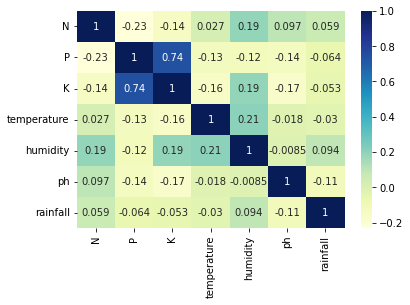

In [22]:
import matplotlib.pyplot as mp
import seaborn as sb
  
print(df.corr())
  
# plotting correlation heatmap
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()